In [83]:
### Decision trees - to predict type of wine
## It is a non-parametric supervised learning method used for classification and regression. 
## The goal is to create a model that predicts the value of a target variable.

In [84]:
## Import the libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [85]:
df = pd.read_csv('../data/PreProcessed/MixWine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


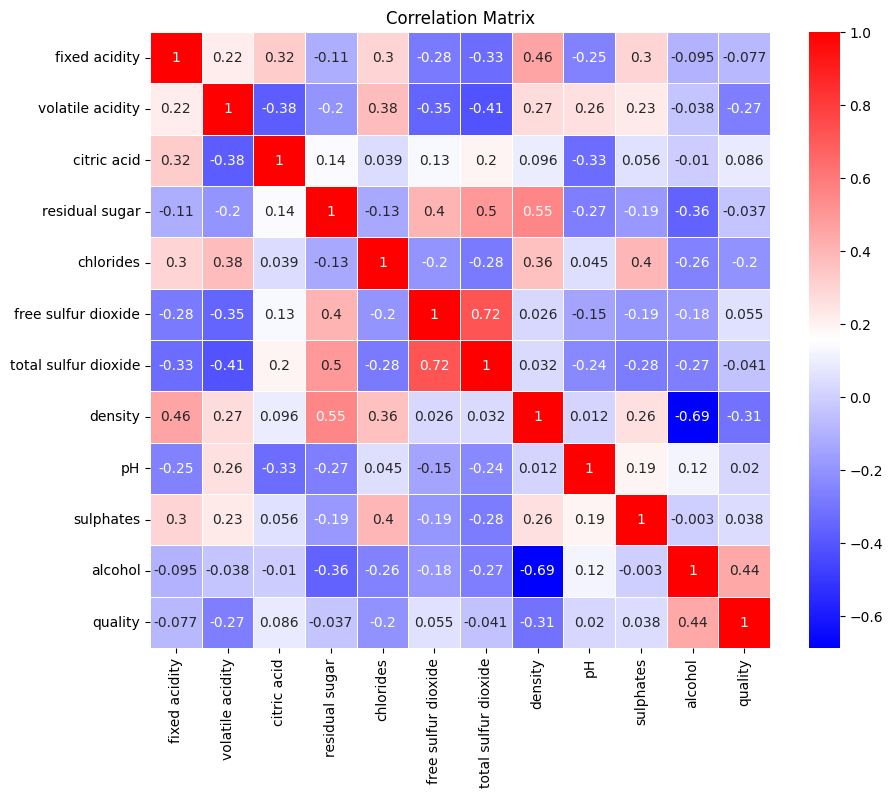

In [86]:
df_ = df.select_dtypes(include=['number'])
corr_matrix = df_.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='bwr', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## As free sulfur dioxide and total sulfur dioxide has strong coorelation. Let us drop one of these columns

In [87]:
df = df.drop("free sulfur dioxide", axis="columns")

In [88]:
target = df["wine_name"]
input_data = df.drop("wine_name", axis = "columns")

#### Normalizing the attributes so that everything becomes scaled equally

In [89]:
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(input_data)
normal_df = pd.DataFrame(normal_df, columns = input_data.columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   total sulfur dioxide   density        pH  sulphates   alcohol   quality  
0              0.064516  0.206092  0.612403   0.191011  0.202899  0.333333  
1              0.140553  0.186813  0.372093   0.258427  0.260870  0.333333  
2              0.110599  0.190669  0.418605   0.241573  0.260870  0.333333  
3              0.124424  0.209948  0.341085   0.202247  0.260870  0.500000  
4              0.064516  0.206092  0.612403   0.191011  0.202899  0.333333  


#### Let's split the dataseet to train and test, stratify to keep the same proportion

In [90]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target, stratify=target)

In [91]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9833846153846154

#### Let's check the accuracy of the test and train data sets

In [92]:
train_predictions = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate test accuracy
test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Compare training and test accuracy
print(f"Training Accuracy: {train_accuracy:.5f}")
print(f"Test Accuracy: {test_accuracy:.5f}")

Training Accuracy: 0.99979
Test Accuracy: 0.98338


#### Let's see the confusion matrix for test data

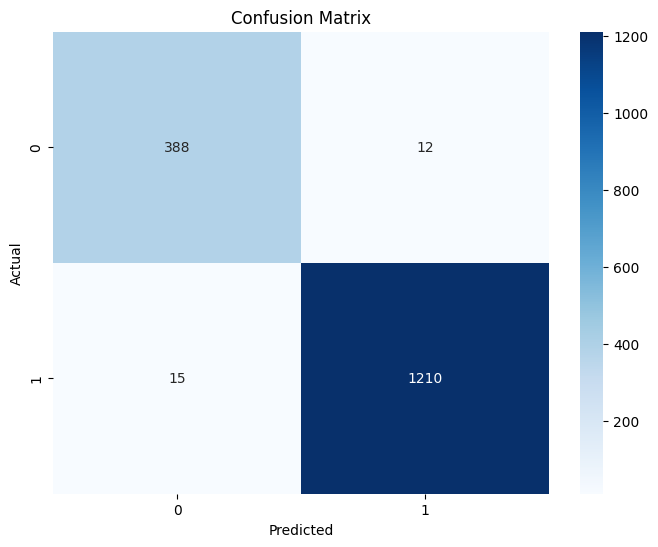

In [93]:
y_pred = model.predict(x_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Model is performing very well on both train and test data which is desirable but we should check more for overfitting
#### Let's do k fold validation for different values of k

In [94]:
for k in range(2, 10):
    model = tree.DecisionTreeClassifier()
    # k = 5  
    scores = cross_val_score(model, x_train, y_train, cv=k)
    # scores = cross_val_score(model, x_train, y_train, cv=k, scoring='accuracy')
    # scores = cross_val_score(model, x_train, y_train, cv=k, scoring='f1_macro')
    print("k is: ", k)
    # Print the cross-validation scores
    print("Cross-Validation Scores:", scores)

    # Calculate and print the mean and standard deviation of the scores
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

k is:  2
Cross-Validation Scores: [0.98029557 0.97783251]
0.98 accuracy with a standard deviation of 0.00
k is:  3
Cross-Validation Scores: [0.98522167 0.98214286 0.98460591]
0.98 accuracy with a standard deviation of 0.00
k is:  4
Cross-Validation Scores: [0.98029557 0.97619048 0.98768473 0.98522167]
0.98 accuracy with a standard deviation of 0.00
k is:  5
Cross-Validation Scores: [0.98461538 0.98358974 0.9825462  0.98562628 0.98459959]
0.98 accuracy with a standard deviation of 0.00
k is:  6
Cross-Validation Scores: [0.98891626 0.9864532  0.97906404 0.98152709 0.99137931 0.98275862]
0.99 accuracy with a standard deviation of 0.00
k is:  7
Cross-Validation Scores: [0.98994253 0.99137931 0.97413793 0.99137931 0.97988506 0.9841954
 0.98706897]
0.99 accuracy with a standard deviation of 0.01
k is:  8
Cross-Validation Scores: [0.98850575 0.98850575 0.98029557 0.97208539 0.98850575 0.98850575
 0.98686371 0.9819376 ]
0.98 accuracy with a standard deviation of 0.01
k is:  9
Cross-Validation 

#### After k cross validation, let us again see the accuracy on the test dataset

In [95]:
# Create and fit your Decision Tree model (replace with your actual model and data)
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)  # Assuming you have x_train and y_train

# Make predictions on the test data
test_predictions = model.predict(x_test)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.99


### Let's draw and see the complexity of the tree

In [96]:
# Set up the figure
fig = plt.figure(figsize=(100, 100))

# Plot the Decision Tree
_ = tree.plot_tree(model, 
                   feature_names=x_train.columns,
                   class_names=True,          
                   filled=True)

plt.show()

#### The combination of high accuracy and low standard deviation is generally a sign of a high-quality model
#### It looks our model is doing good but the decision tree looks complex so let's move ahead and do some Regularization by adjusting some parameters.
#### Set the maximum depth or increasing the minimum samples per leaf will help the complexity of the tree

In [97]:
# Create your Decision Tree model with regularization
model = tree.DecisionTreeClassifier(
    max_depth=2,                    # Set the maximum depth (adjust as needed)
    min_samples_leaf=10,             # Set the minimum samples per leaf (adjust as needed)
    min_samples_split=10,           # Set the minimum samples per split (adjust as needed)
    max_features=None               # Set the maximum number of features to consider (None means all)
)

# Fit the regularized model to the training data
model.fit(x_train, y_train)

# Evaluate the model as before
test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy with Regularization: {test_accuracy:.2f}")

Test Accuracy with Regularization: 0.95


In [ ]:
### To calculate precision, recall, and F1 score

In [100]:
# regularized Decision Tree model
test_predictions = model.predict(x_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, test_predictions, average='weighted', zero_division=1)
recall = recall_score(y_test, test_predictions, average='weighted', zero_division=1)
f1 = f1_score(y_test, test_predictions, average='weighted', zero_division=1)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.96
Recall: 0.95
F1 Score: 0.95


### New model after tunning some parameters gives accuracy of 96% which is good and it should not overfit
### Decision tree below also doesn't look complex now

In [98]:
# Set up the figure
fig = plt.figure(figsize=(100, 100))

# Plot the Decision Tree
_ = tree.plot_tree(model, 
                   feature_names=x_train.columns,  # Replace with your feature names
                   class_names=True,               # Set to True if your target variable contains class names
                   filled=True)

plt.show()

### Confusion matrix of the tuned decision tree

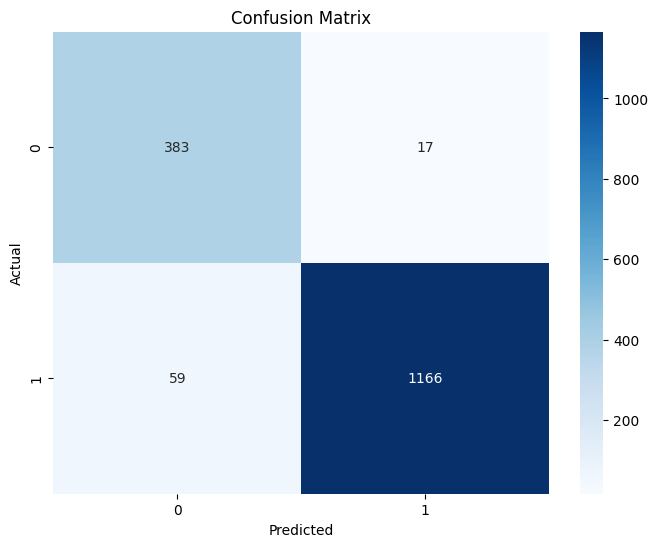

In [99]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 🍷 Training a Model to Predict Wine Quality 🍇

In this section, we'll dive into training a machine learning model to predict the quality of wine. The goal is to create a predictive model that can assess the quality of wine based on various features.

In [101]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5,red


In [102]:
df['wine_name'] = df['wine_name'].map({'red': 1, 'white': 0})

In [103]:
target = df["quality"]
input_data = df.drop("quality", axis = "columns")

In [104]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target, stratify=target)
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

train_predictions = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate test accuracy
test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Compare training and test accuracy
print(f"Training Accuracy: {train_accuracy:.5f}")
print(f"Test Accuracy: {test_accuracy:.5f}")

Training Accuracy: 1.00000
Test Accuracy: 0.58031


### The significant difference between training accuracy and test accuracy (known as overfitting) suggests that the decision tree model is learning the training data too well and failing to generalize to new, unseen data

In [108]:
# Create your Decision Tree model with regularization
model = tree.DecisionTreeClassifier(
    max_depth=2,                    # Set the maximum depth (adjust as needed)
    min_samples_leaf=5,             # Set the minimum samples per leaf (adjust as needed)
    min_samples_split=5,           # Set the minimum samples per split (adjust as needed)
    max_features=None               # Set the maximum number of features to consider (None means all)
)

# Fit the regularized model to the training data
model.fit(x_train, y_train)

# Evaluate the model as before
test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Train Accuracy with regularization: {model.score(x_train, y_train)}")
print(f"Test Accuracy with Regularization: {test_accuracy:.2f}")

Train Accuracy with regularization: 0.5240147783251231
Test Accuracy with Regularization: 0.52


### To calculate precision, recall, and F1 score

In [109]:
# regularized Decision Tree model
test_predictions = model.predict(x_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, test_predictions, average='weighted', zero_division=1)
recall = recall_score(y_test, test_predictions, average='weighted', zero_division=1)
f1 = f1_score(y_test, test_predictions, average='weighted', zero_division=1)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.63
Recall: 0.52
F1 Score: 0.45


# *Conclusion:*

##### For wine type classification, we implemented decision tree which was complex(high number of nodes and very high depth). Also score for training and test data was very high indicated possibility of overfitting. We implemented k-fold cross-validation and did some regularization(pruning). These techniques helped us to address potential overfitting issue.##### For wine quality classification, we implemented complex and regularized tree but scores were not very high as can be seen in the table below.

##### By implementing a Decision Tree model on the Wine Quality dataset,The following Performance Metrics Table shows the results of the Decision tree analysis:

| Model                          | Accuracy Score | Precision | Recall | F1-score |
| ------------------------------ | -------------- | --------- | ------ | -------- |
| Wine Type(classification)      | 0.95           | 0.96      | 0.95   | 0.95     |
| Wine Quality(classification)   | 0.52           | 0.63      | 0.52   | 0.45     |